**Import the libraries and Load the dataset**

In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


**Splitting the data into training and testing data**

In [2]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(training_images.shape)

(60000, 28, 28)


In [4]:
print(test_images.shape)

(10000, 28, 28)


5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

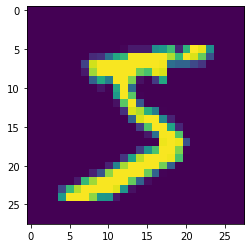

In [5]:
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

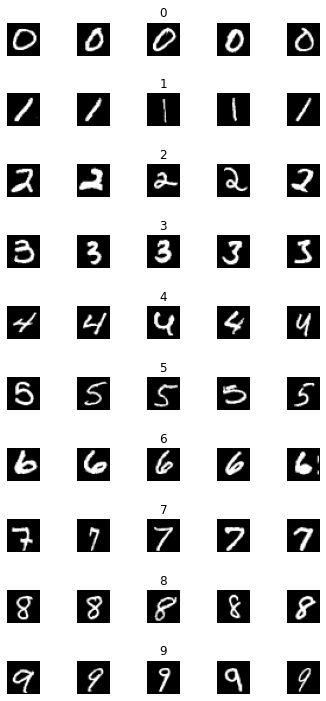

In [6]:
import random
num_of_samples = []

cols = 5 #We will select 5 random images
num_of_classes = 10 #each digit total: 10

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                       figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_of_classes):
    x_selected = training_images[training_labels == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)),
                                :, :],
                    cmap=plt.get_cmap('gray')) 
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

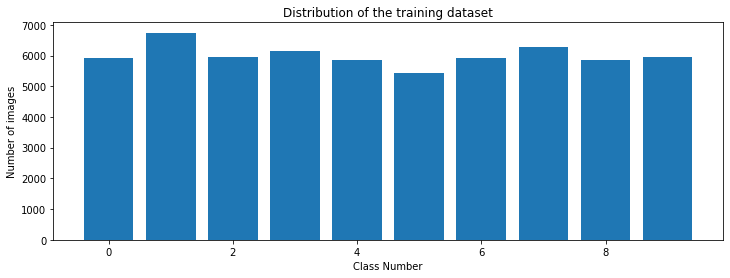

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

**Preprocess the Data**


In [8]:
training_images = training_images.reshape(training_images.shape[0], 28, 28,1)
test_images = test_images.reshape(test_images.shape[0], 28, 28,1)

In [9]:
print(training_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
# Example for to_categorical()

z = [1, 2, 0, 3]
tf.keras.utils.to_categorical(z, num_classes=4)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [11]:
# convert class vectors to binary class matrices

num_classes = 10
training_labels = keras.utils.to_categorical(training_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)


In [12]:
print(training_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [13]:
print(test_labels)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
training_images = training_images.astype('float32')
test_images = test_images.astype('float32')

In [15]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [16]:
print('Training images shape:', training_images.shape)
print(training_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

Training images shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**Create the model**

In [17]:
batch_size = 128
num_classes = 10
input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

**Train the model**

In [19]:
history = model.fit(training_images, training_labels,batch_size=batch_size,
                 epochs = 5, verbose = 1, validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.2953 - accuracy: 0.9093 - val_loss: 0.0605 - val_accuracy: 0.9796
Epoch 2/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1011 - accuracy: 0.9701 - val_loss: 0.0428 - val_accuracy: 0.9858
Epoch 3/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0758 - accuracy: 0.9772 - val_loss: 0.0332 - val_accuracy: 0.9891
Epoch 4/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0643 - accuracy: 0.9807 - val_loss: 0.0323 - val_accuracy: 0.9891
Epoch 5/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0570 - accuracy: 0.9827 - val_loss: 0.0290 - val_accuracy: 0.9899


**Evaluate the Model**

In [20]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029026737729845625
Test accuracy: 0.9898999929428101


In [21]:
classifications = model.predict(test_images)

print(classifications[0])

[8.6000157e-10 4.1455039e-09 4.8470059e-07 5.9448496e-08 7.1533096e-10
 7.6351168e-11 1.6419444e-12 9.9999940e-01 2.3502045e-09 8.3064648e-08]


In [22]:
print(test_labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
